## Importando Bibliotecas

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Importando DataBase

In [2]:
data = pd.read_csv("dataset_SIN492.parquet.csv")
data.head(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
2,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
5,850.0,9,1435.68,1.60,-848.40,0.589167,1440,0.003879,1.692221,371185,2745.78,0.522868,40.400000,0.014583,68.365714,21,1
6,50.0,1,436.85,6.80,-82.15,0.238116,345,0.018375,5.317712,18776,959.57,0.455256,20.537500,0.011594,109.212500,4,1
7,0.0,0,0.00,-6.50,-16.80,0.150000,112,0.017231,0.000000,6500,6692.13,0.000000,0.000000,0.000000,0.000000,0,0
8,100.0,11,1027.86,79.76,-110.56,0.362500,288,0.015098,9.845402,19075,3611.20,0.284631,8.030769,0.045139,79.066154,13,0
9,600.0,21,2876.01,3.68,-596.32,0.265251,2247,0.004584,4.825358,490191,2324.27,1.237382,31.369474,0.008456,151.368947,19,1


### Matriz de Correlação

<Axes: >

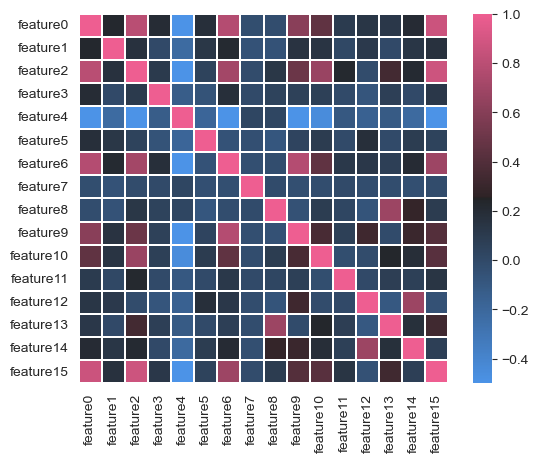

In [3]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

## Identificando outliers

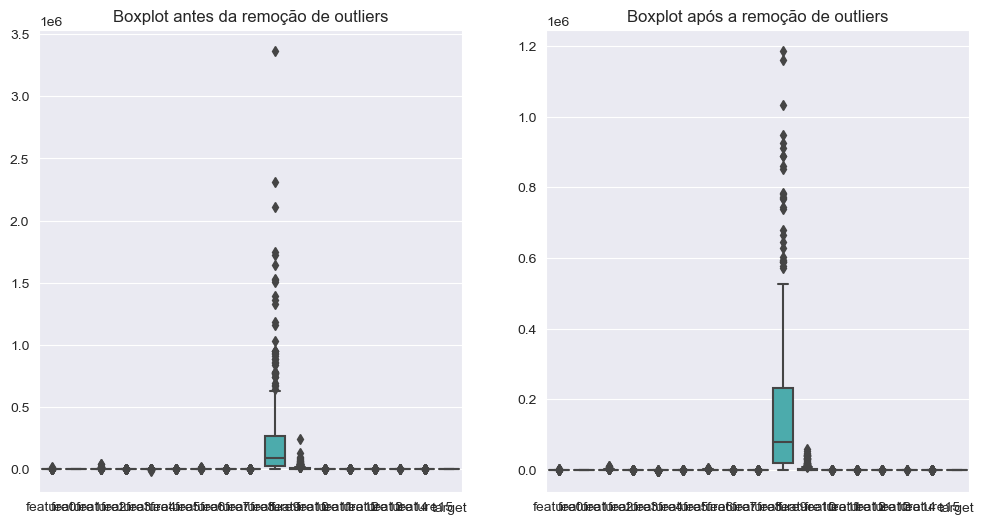

In [4]:
# Carregando os dados
data = pd.read_csv("dataset_SIN492.parquet.csv")

# Identificando outliers usando z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(data))
threshold = 3  # Define um limiar para identificar outliers

# Filtra as linhas que não contêm outliers
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

#Visualiza os dados antes e depois da remoção de outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data)
plt.title('Boxplot antes da remoção de outliers')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers)
plt.title('Boxplot após a remoção de outliers')

plt.show()

In [5]:
print(data_no_outliers)


     feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0       200.0         2    662.28     39.10   -188.55  0.246978       761   
1       150.0         3      0.00    149.55     -0.45  0.150000         3   
3       100.0        22      0.00     43.84    -56.16  0.150968       372   
4        50.0        18     87.56     -3.05    -94.50  0.412664       229   
5       850.0         9   1435.68      1.60   -848.40  0.589167      1440   
..        ...       ...       ...       ...       ...       ...       ...   
459       0.0         5      0.00     -0.10    -50.10  0.150000       334   
460    1050.0         9   1955.83     17.20  -1231.20  0.600000      1968   
462     350.0         7      0.00     -1.99   -351.99  0.684805       514   
463     400.0         4   1100.07    -18.20   -438.60  0.748464       586   
464     150.0        31      0.00    114.30    -35.70  0.300000       119   

     feature7  feature8  feature9  feature10  feature11  feature12  feature

## Prevenção de Frequência Zero

In [6]:
# data = pd.read_csv("dataset_SIN492.parquet.csv")

##Nome da Coluna com as classificações
target_column = 'target'

##Seleciona todos os dados das colunas retirando a coluna target_column
num_colunas = data_no_outliers.drop(columns=[target_column]).select_dtypes(include=['number'])
dataN = data_no_outliers.drop(columns=[target_column])

df = pd.DataFrame(dataN)
df.replace(0, pd.NA, inplace=True)
dataN = df.dropna(axis=1)

print(dataN)

     feature4  feature5  feature6  feature7  feature9
0     -188.55  0.246978       761  0.004548    167326
1       -0.45  0.150000         3  0.037975        79
3      -56.16  0.150968       372  0.005854     63544
4      -94.50  0.412664       229  0.004572     50089
5     -848.40  0.589167      1440  0.003879    371185
..        ...       ...       ...       ...       ...
459    -50.10  0.150000       334  0.011295     29570
460  -1231.20  0.600000      1968  0.007718    255002
462   -351.99  0.684805       514  0.004000    128499
463   -438.60  0.748464       586  0.003683    159109
464    -35.70  0.300000       119  0.003834     31040

[402 rows x 5 columns]


## Adicionando Média dos dados

In [7]:

# Calculando a média de cada linha
dataN['media'] = dataN.mean(axis=1)

# # Calculando o desvio padrão de cada coluna
# desvios_padrao = data_no_outliers.std()

# # Adicionando os resultados em uma nova coluna chamada 'desvio_padrao'
# dataN['desvio_padrao'] = desvios_padrao


# Exibindo as 10 primeiras linhas do DataFrame
print(dataN)

     feature4  feature5  feature6  feature7  feature9         media
0     -188.55  0.246978       761  0.004548    167326  33579.740305
1       -0.45  0.150000         3  0.037975        79     16.347595
3      -56.16  0.150968       372  0.005854     63544  12771.999364
4      -94.50  0.412664       229  0.004572     50089  10044.783447
5     -848.40  0.589167      1440  0.003879    371185  74355.438609
..        ...       ...       ...       ...       ...           ...
459    -50.10  0.150000       334  0.011295     29570   5970.812259
460  -1231.20  0.600000      1968  0.007718    255002  51147.881544
462   -351.99  0.684805       514  0.004000    128499  25732.339761
463   -438.60  0.748464       586  0.003683    159109  31851.430429
464    -35.70  0.300000       119  0.003834     31040   6224.720767

[402 rows x 6 columns]


C:\Users\btmir\AppData\Local\Temp\ipykernel_18764\2216649036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataN['media'] = dataN.mean(axis=1)


# Normalização

In [8]:
num_colunas = dataN.select_dtypes(include=['number'])
dataN[num_colunas.columns] = (num_colunas - num_colunas.mean()) / num_colunas.std()
data_no_outliers = pd.concat([dataN, data_no_outliers[[target_column]]], axis=1)


# colunas_desejadas = ['feature5', 'feature6', 'media', 'target']

# data = data_no_outliers[colunas_desejadas]

data = data_no_outliers

print(data)

     feature4  feature5  feature6  feature7  feature9     media  target
0    0.283719 -0.503841 -0.022868 -0.199144 -0.001102 -0.000688       0
1    0.770784 -0.806972 -0.858981  0.482893 -0.779547 -0.780306       1
3    0.626529 -0.803947 -0.451955 -0.172492 -0.484151 -0.484015       1
4    0.527252  0.014057 -0.609691 -0.198657 -0.546777 -0.547363       0
5   -1.424893  0.565766  0.726105 -0.212785  0.947754  0.946460       1
..        ...       ...       ...       ...       ...       ...     ...
459  0.642221 -0.806972 -0.493871 -0.061474 -0.642282 -0.641994       1
460 -2.416114  0.599628  1.308516 -0.134472  0.406984  0.407390       1
462 -0.139492  0.864711 -0.295322 -0.210325 -0.181821 -0.182969       1
463 -0.363759  1.063694 -0.215902 -0.216793 -0.039347 -0.040833       0
464  0.679508 -0.338105 -0.731027 -0.213718 -0.635440 -0.636097       0

[402 rows x 7 columns]


C:\Users\btmir\AppData\Local\Temp\ipykernel_18764\99108818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataN[num_colunas.columns] = (num_colunas - num_colunas.mean()) / num_colunas.std()


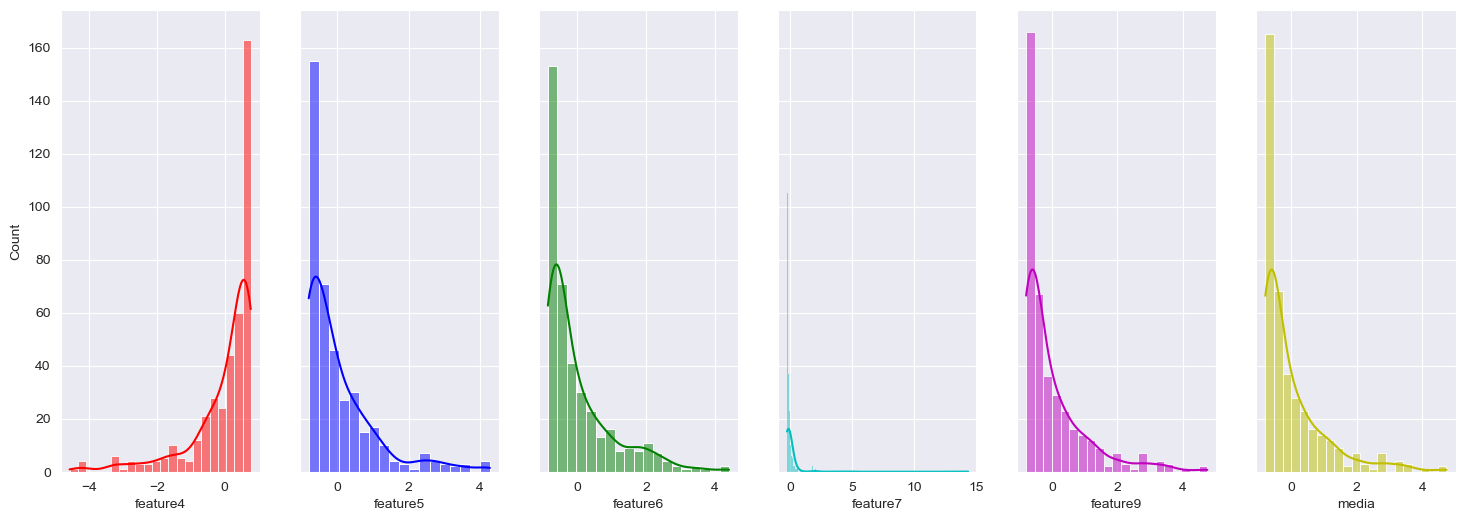

In [9]:
fig, axes = plt.subplots(1, 6, figsize=(18, 6), sharey=True)

# Subplot para feature4
sns.histplot(data, ax=axes[0], x="feature4", kde=True, color='r')

# Subplot para feature5
sns.histplot(data, ax=axes[1], x="feature5", kde=True, color='b')

# Subplot para feature6
sns.histplot(data, ax=axes[2], x="feature6", kde=True, color='g')

# Subplot para feature7
sns.histplot(data, ax=axes[3], x="feature7", kde=True, color='c')

# Subplot para feature9
sns.histplot(data, ax=axes[4], x="feature9", kde=True, color='m')

# Subplot para média
sns.histplot(data, ax=axes[5], x="media", kde=True, color='y')

plt.show()

## Resultado 

In [10]:
def calculate_prior(df, Y):
    # Obter as classes únicas presentes na coluna alvo (Y)
    classes = sorted(list(df[Y].unique()))
    
    # Inicializar uma lista para armazenar as probabilidades a priori
    prior = []
    
    # Para cada classe, calcular a probabilidade a priori
    for i in classes:
        prior.append(len(df[df[Y] == i]) / len(df))
    
    # Retornar a lista de probabilidades a priori
    return prior


In [11]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    # Obter os nomes das features no DataFrame
    feat = list(df.columns)
    
    # Filtrar o DataFrame para conter apenas as linhas onde a classe (Y) é igual ao rótulo especificado
    df = df[df[Y] == label]
    
    # Calcular a média e o desvio padrão da feature (feat_name) para a classe específica
    mean, std = df[feat_name].mean(), df[feat_name].std()
    
    # Calcular a probabilidade condicional P(X|Y) usando a distribuição Gaussiana
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val - mean)**2 / (2 * std**2)))
    
    # Retornar a probabilidade condicional calculada
    return p_x_given_y


In [12]:
def naive_bayes_gaussian(df, X, Y):
    # Obter os nomes das features
    features = list(df.columns)[:-1]

    # Calcular a probabilidade a priori
    prior = calculate_prior(df, Y)

    Y_pred = []
    # Iterar sobre cada amostra de dados
    for x in X:
        # Calcular a verossimilhança
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # Calcular a probabilidade a posteriori (apenas o numerador)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        # Adicionar a classe predita com base na probabilidade a posteriori
        Y_pred.append(np.argmax(post_prob))

    # Retornar as predições como um array NumPy
    return np.array(Y_pred)


In [13]:
print(data)

     feature4  feature5  feature6  feature7  feature9     media  target
0    0.283719 -0.503841 -0.022868 -0.199144 -0.001102 -0.000688       0
1    0.770784 -0.806972 -0.858981  0.482893 -0.779547 -0.780306       1
3    0.626529 -0.803947 -0.451955 -0.172492 -0.484151 -0.484015       1
4    0.527252  0.014057 -0.609691 -0.198657 -0.546777 -0.547363       0
5   -1.424893  0.565766  0.726105 -0.212785  0.947754  0.946460       1
..        ...       ...       ...       ...       ...       ...     ...
459  0.642221 -0.806972 -0.493871 -0.061474 -0.642282 -0.641994       1
460 -2.416114  0.599628  1.308516 -0.134472  0.406984  0.407390       1
462 -0.139492  0.864711 -0.295322 -0.210325 -0.181821 -0.182969       1
463 -0.363759  1.063694 -0.215902 -0.216793 -0.039347 -0.040833       0
464  0.679508 -0.338105 -0.731027 -0.213718 -0.635440 -0.636097       0

[402 rows x 7 columns]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Dividir os dados em conjuntos de treinamento e teste
train, test = train_test_split(data, test_size=.2, random_state=41)

# Preparar os dados de teste
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

# Realizar previsões usando o modelo Naive Bayes
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="target")

# Calcular e imprimir a matriz de confusão
print("Confusion Matrix:")
cf = confusion_matrix(Y_test, Y_pred)
print(cf)


# Calcular e imprimir o F1 Score
print("F1 Score:", f1_score(Y_test, Y_pred))

# Calcular e imprimir a Acurácia
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Confusion Matrix:
[[14 30]
 [ 4 33]]
F1 Score: 0.6599999999999999
Accuracy: 0.5802469135802469


In [15]:
# # Cria uma figura e um eixo
# plt.figure(figsize=(5, 5))
# sns.set(font_scale=1.2)
# sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=np.unique(data['target']),
#             yticklabels=np.unique(data['target']))

# # Adiciona rótulos aos eixos
# plt.xlabel('Previsto')
# plt.ylabel('Real')
# plt.title('Matriz de Confusão')

# # Exibe a matriz de confusão
# plt.savefig(f'matrizC.pdf')
# plt.show()